# Selenium 

In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import seaborn as sns

In [33]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [2]:
driver = "./chromedriver.exe"
driver = webdriver.Chrome(driver)
driver.get("https://www.dondeporte.com/balones-balonmano")
driver.implicitly_wait(2) # is like a time.sleep but specific of selenium
driver.find_element_by_css_selector("#cookiesplus-content > div > form > div.cookiesplus-actions.col-12.col-xs-12 > div:nth-child(1) > button.cookiesplus-btn.cookiesplus-accept.float-xs-right").click()

lista = []
lista_precios = []
for i in range (1,17):
    a = driver.find_element_by_css_selector(f"#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child({i}) > div > div.right-block > div.product_name_block > h5 > a").text
    lista.append(a)
    
    b = driver.find_element_by_css_selector(f"#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child({i}) > div > div.right-block > div.content_price > span.price.product-price").text
    lista_precios.append(b)
    



<ipython-input-2-049a54ab767c>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver)
<ipython-input-2-049a54ab767c>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#cookiesplus-content > div > form > div.cookiesplus-actions.col-12.col-xs-12 > div:nth-child(1) > button.cookiesplus-btn.cookiesplus-accept.float-xs-right").click()
<ipython-input-2-049a54ab767c>:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  a = driver.find_element_by_css_selector(f"#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child({i}) > div > div.right-block > div.product_name_block > h5 > a").text
<ipython-input-2-049a54ab767c>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  b = driver.find_element_by_css_selector(f"#c

In [3]:
lista1 = pd.DataFrame(lista, lista_precios).reset_index()
lista1

,index,0
0,"9,90 €",Balón Balonmano Matt IH 730 58cm Azul
1,"11,95 €",Balón Balonmano Softee Microcelular T/1
2,"11,95 €",Balón Balonmano Microcelular New T/1 Verde
3,"14,90 €",Balón Balonmano Molten H3X1700
4,"67,90 €",Balón Balonmano Molten H3X5001
5,"11,95 €",Balón Balonmano Microcelular New T/0 Azul
6,"36,90 €",Balón Balonmano Molten H-X3200
7,"25,90 €",Balón Balonmano Molten H0X2200
8,"21,90 €",Balón Balonmano Molten H-X1800
9,"67,90 €",Balón Balonmano Molten H2X5001


In [4]:
diccio_nuevas3 = {"index": "Precio", 0: "Nombre"}
lista1.rename(columns = diccio_nuevas3, inplace=True)

In [5]:
lista1

,Precio,Nombre
0,"9,90 €",Balón Balonmano Matt IH 730 58cm Azul
1,"11,95 €",Balón Balonmano Softee Microcelular T/1
2,"11,95 €",Balón Balonmano Microcelular New T/1 Verde
3,"14,90 €",Balón Balonmano Molten H3X1700
4,"67,90 €",Balón Balonmano Molten H3X5001
5,"11,95 €",Balón Balonmano Microcelular New T/0 Azul
6,"36,90 €",Balón Balonmano Molten H-X3200
7,"25,90 €",Balón Balonmano Molten H0X2200
8,"21,90 €",Balón Balonmano Molten H-X1800
9,"67,90 €",Balón Balonmano Molten H2X5001


In [6]:
lista_precios[0].split(" ")[0].split(",")

['9', '90']

In [23]:
def numerito(x):
    y = '.'.join(x.split(" ")[0].split(","))
    return float(y)

In [24]:
float('.'.join(lista_precios[0].split(" ")[0].split(",")))

9.9

In [25]:
lista_precios[0]

'9,90 €'

In [26]:
numerito('9,90 €')

9.9

In [27]:
lista1["Precio a operar"] = lista1["Precio"].apply(numerito)

In [29]:
lista1

,Precio,Nombre,Precio a operar
0,"9,90 €",Balón Balonmano Matt IH 730 58cm Azul,9.90
1,"11,95 €",Balón Balonmano Softee Microcelular T/1,11.95
2,"11,95 €",Balón Balonmano Microcelular New T/1 Verde,11.95
3,"14,90 €",Balón Balonmano Molten H3X1700,14.90
4,"67,90 €",Balón Balonmano Molten H3X5001,67.90
5,"11,95 €",Balón Balonmano Microcelular New T/0 Azul,11.95
6,"36,90 €",Balón Balonmano Molten H-X3200,36.90
7,"25,90 €",Balón Balonmano Molten H0X2200,25.90
8,"21,90 €",Balón Balonmano Molten H-X1800,21.90
9,"67,90 €",Balón Balonmano Molten H2X5001,67.90


<AxesSubplot:xlabel='Precio a operar', ylabel='Count'>

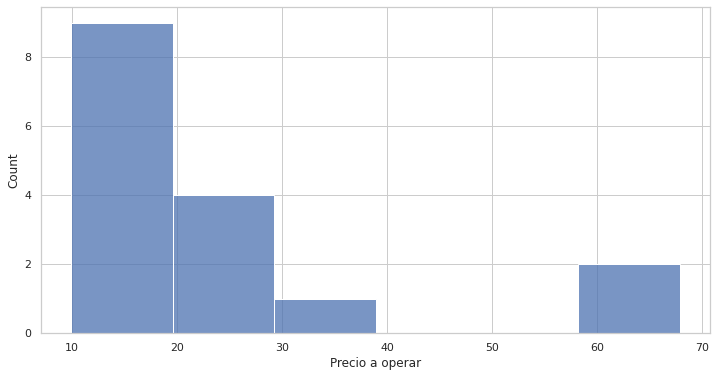

In [34]:
sns.histplot(x=lista1["Precio a operar"])

<AxesSubplot:xlabel='Precio a operar'>

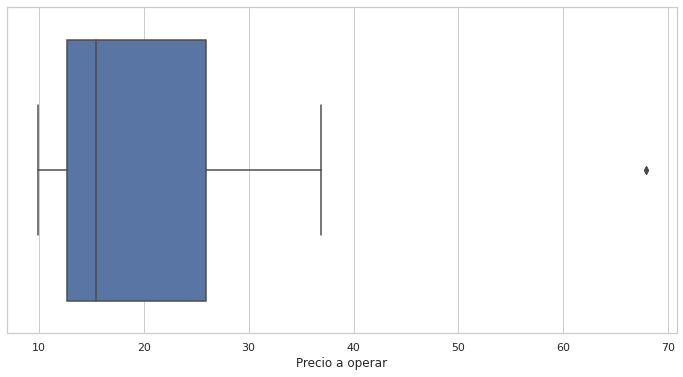

In [35]:
sns.boxplot(x="Precio a operar", data=lista1)


In [40]:
#drop 
#marca

lista1 = lista1.drop([10])#quitamos todas la cabeceras porque tienen el index 0 
lista1.reset_index(drop=True)

,Precio,Nombre,Precio a operar
0,"9,90 €",Balón Balonmano Matt IH 730 58cm Azul,9.90
1,"11,95 €",Balón Balonmano Softee Microcelular T/1,11.95
2,"11,95 €",Balón Balonmano Microcelular New T/1 Verde,11.95
3,"14,90 €",Balón Balonmano Molten H3X1700,14.90
4,"67,90 €",Balón Balonmano Molten H3X5001,67.90
5,"11,95 €",Balón Balonmano Microcelular New T/0 Azul,11.95
6,"36,90 €",Balón Balonmano Molten H-X3200,36.90
7,"25,90 €",Balón Balonmano Molten H0X2200,25.90
8,"21,90 €",Balón Balonmano Molten H-X1800,21.90
9,"67,90 €",Balón Balonmano Molten H2X5001,67.90


In [41]:
def devuelvelamarca(x):
    return x.split(" ")[2] 

In [42]:
lista1["Marca"] = lista1["Nombre"].apply(devuelvelamarca)

In [43]:
lista1

,Precio,Nombre,Precio a operar,Marca
0,"9,90 €",Balón Balonmano Matt IH 730 58cm Azul,9.90,Matt
1,"11,95 €",Balón Balonmano Softee Microcelular T/1,11.95,Softee
2,"11,95 €",Balón Balonmano Microcelular New T/1 Verde,11.95,Microcelular
3,"14,90 €",Balón Balonmano Molten H3X1700,14.90,Molten
4,"67,90 €",Balón Balonmano Molten H3X5001,67.90,Molten
5,"11,95 €",Balón Balonmano Microcelular New T/0 Azul,11.95,Microcelular
6,"36,90 €",Balón Balonmano Molten H-X3200,36.90,Molten
7,"25,90 €",Balón Balonmano Molten H0X2200,25.90,Molten
8,"21,90 €",Balón Balonmano Molten H-X1800,21.90,Molten
9,"67,90 €",Balón Balonmano Molten H2X5001,67.90,Molten


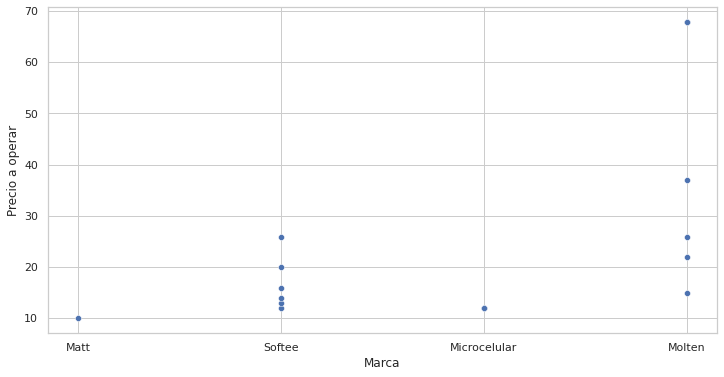

In [44]:
sns.scatterplot(x="Marca", y="Precio a operar", data=lista1);

In [ ]:
#featured-product-8981340 > figcaption > div.featured-product-title.featured-title > a
#featured-product-8980794 > figcaption > div.featured-product-title.featured-title > a
#featured-product-8980417 > figcaption > div.featured-product-title.featured-title > a
#featured-product-8955100 > figcaption > div.featured-product-title.featured-title > a

In [ ]:
#featured-product-8955100 > div > a > img
#featured-product-8954965 > div > a > img

In [ ]:
#buyForm453 > div.product-list-info > a > h3
#buyForm53 > div.product-list-info > a > h3
#buyForm37 > div.product-list-info > a > h3

In [ ]:
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(1) > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(2) > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(3) > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(4) > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(11) > div > div.right-block > div.product_name_block > h5
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.first-in-line.last-line.first-item-of-tablet-line.first-item-of-mobile-line > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.first-in-line.last-line.first-item-of-tablet-line.first-item-of-mobile-line > div > div.right-block > div.product_name_block

#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.last-line.first-item-of-tablet-line.first-item-of-mobile-line.last-mobile-line > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div:nth-child(14) > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.last-in-line.last-line.last-item-of-tablet-line.last-item-of-mobile-line.last-mobile-line > div > div.right-block > div.product_name_block
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.last-line.first-item-of-tablet-line.first-item-of-mobile-line.last-mobile-line > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.last-in-line.last-line.last-item-of-tablet-line.last-item-of-mobile-line.last-mobile-line > div > div.right-block > div.product_name_block > h5 > a
#center_column > div.box-content > div.product_list.grid.clearfix > div.product_block.ajax_block_product.col-xs-6.col-sm-6.col-md-3.last-in-line.last-line.last-item-of-tablet-line.last-item-of-mobile-line.last-mobile-line > div > div.right-block > div.product_name_block > h5 > a